In [1]:
from datasets import load_dataset
from transformers import pipeline
from PIL import ImageDraw, ImageFont

/Users/soubhik/Desktop/AI/full-stack-ai-with-python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("NarchAI1992/Farmhouse_interior", split="train")

Generating train split: 100%|██████████| 83/83 [00:00<00:00, 10996.15 examples/s]


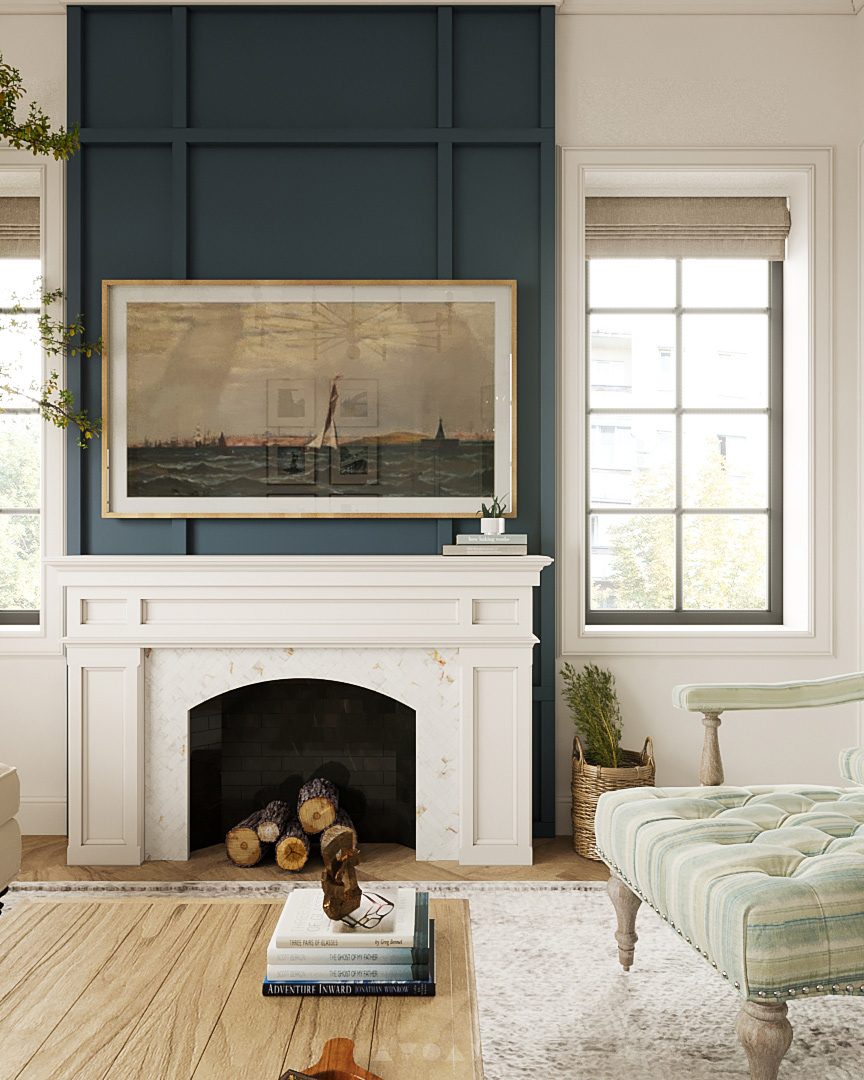

In [3]:
image = dataset[0]["image"]
image

In [4]:
obj_detector = pipeline("zero-shot-object-detection", model="google/owlvit-base-patch32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


In [5]:
objects = ["book", "chair", "painting", "plant", "window"]

In [6]:
image_detections = obj_detector(image, objects)
image_detections

[{'score': 0.2886941730976105,
  'label': 'plant',
  'box': {'xmin': 556, 'ymin': 658, 'xmax': 629, 'ymax': 774}},
 {'score': 0.2668253481388092,
  'label': 'book',
  'box': {'xmin': 261, 'ymin': 889, 'xmax': 436, 'ymax': 999}},
 {'score': 0.23213215172290802,
  'label': 'painting',
  'box': {'xmin': 92, 'ymin': 279, 'xmax': 512, 'ymax': 524}},
 {'score': 0.17222626507282257,
  'label': 'window',
  'box': {'xmin': 574, 'ymin': 181, 'xmax': 816, 'ymax': 640}},
 {'score': 0.15006926655769348,
  'label': 'plant',
  'box': {'xmin': 0, 'ymin': 37, 'xmax': 109, 'ymax': 506}},
 {'score': 0.13590630888938904,
  'label': 'plant',
  'box': {'xmin': 556, 'ymin': 650, 'xmax': 640, 'ymax': 857}},
 {'score': 0.11016814410686493,
  'label': 'plant',
  'box': {'xmin': 476, 'ymin': 491, 'xmax': 511, 'ymax': 537}}]

In [7]:
draw = ImageDraw.Draw(image)

In [9]:
for detection in image_detections:
    box = detection["box"]
    label = detection["label"]
    score = detection["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=4)
    # For macOS, Arial is typically at:
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white", font=ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 40))

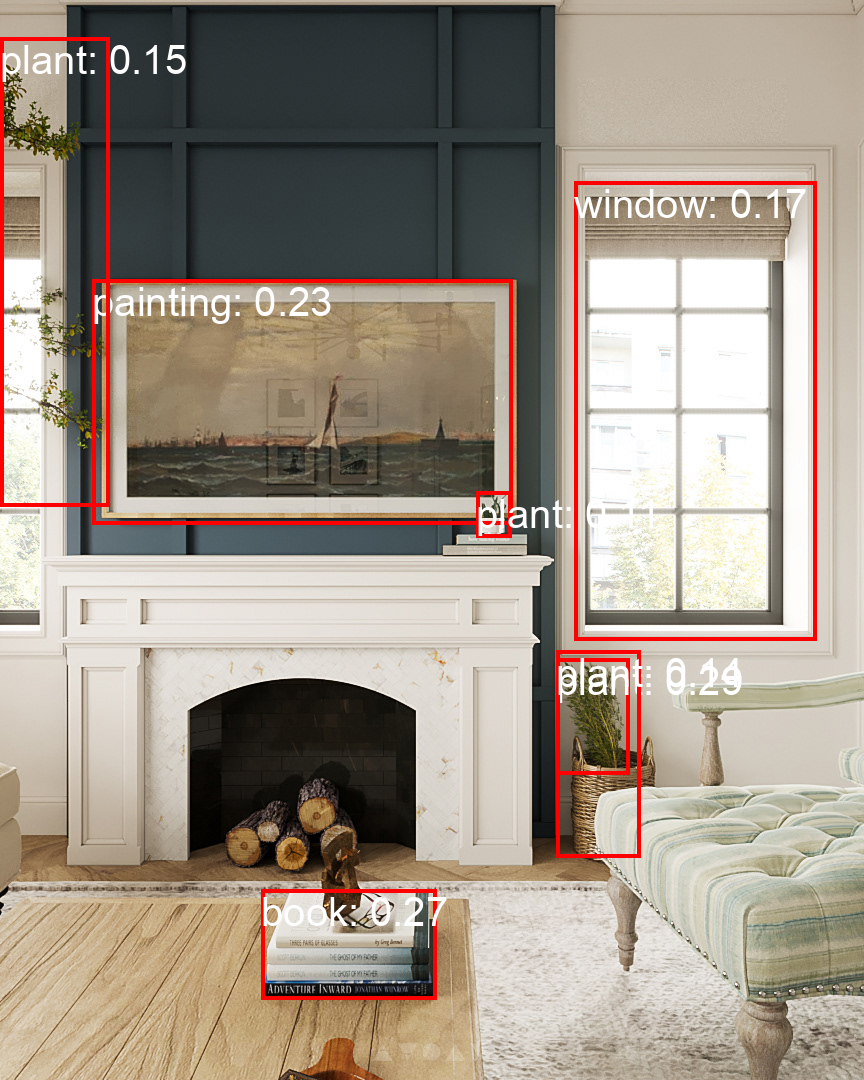

In [10]:
image